# Ankkit Prakash

## What is the most common range of the orbit eccentricites, orbit inclinations, and orbit axes of asteroids that are hazardous to Earth? 

I intend to explore the relationships between the eccentricity, inclination, and axis of asteroids that are hazardous to Earth. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import group34_code.project_functions2 as pf2

df = pf2.load_and_process("../data/raw/orbits.csv")
df

,Object Name,Object Classification,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude
0,54509 YORP,Apollo Asteroid,52718,1.0001,0.2299,1.8331,274.1013,281.8867,314.1326,0.7701,1.23,1.00,0.0027,84,22.70
1,209215 (2003 WP25),Aten Asteroid,57800,0.9889,0.1211,2.5621,226.4096,40.7694,302.2741,0.8692,1.11,0.98,0.0225,22,24.20
2,256004 (2006 UP),Amor Asteroid,55723,1.5868,0.3017,2.2841,334.8158,48.0175,119.1471,1.1080,2.07,2.00,0.1133,56,23.00
3,293726 (2007 RQ17),Apollo Asteroid,57800,1.5798,0.3696,2.0087,302.0884,350.6146,291.7948,0.9959,2.16,1.99,0.0209,37,22.60
4,326354 (2000 SJ344),Apollo Asteroid,57800,1.1400,0.1745,5.7671,18.7778,14.9799,152.2118,0.9410,1.34,1.22,0.0452,26,22.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6965,(2017 CO1),Apollo Asteroid,57788,1.1166,0.3815,0.8985,139.5323,255.7588,63.0440,0.6906,1.54,1.18,0.0103,1,23.36
6966,(2017 CP1),Apollo Asteroid,57788,1.4188,0.2986,2.8881,193.8262,331.0082,343.4468,0.9951,1.84,1.69,0.0090,1,24.60
6967,(2017 CQ1),Apollo Asteroid,57787,1.1833,0.2144,7.8412,270.0117,313.5510,294.8778,0.9296,1.44,1.29,0.0596,1,24.20
6968,(2017 CP5),Amor Asteroid,57800,1.5131,0.3275,14.2656,46.6749,130.7234,344.8663,1.0175,2.01,1.86,0.0934,1,24.74


## Plotting the Orbit Eccentricity against the Orbit Inclination of Near Earth Asteroids of a magnitude between 22.5 and 27.5

### Plotting the Orbit Eccentricity against the Asteroid Magnitude, and Orbit Inclination against the Asteroid Magnitude to see if there is any correlation.

#### Q) What is the orbit eccentricity?
The orbital eccentricity of an astronomical object is a dimensionless parameter that determines the amount by which its orbit around another body deviates from a perfect circle. 

The eccentricity may take the following values:
- circular orbit: e = 0
- elliptic orbit: 0 < e < 1
- parabolic trajectory: e = 1
- hyperbolic trajectory: e > 1

Source: https://en.wikipedia.org/wiki/Orbital_eccentricity#Definition


### Q) What is the orbit inclination?
Orbital inclination measures the tilt of an object's orbit around a celestial body. It is expressed as the angle between a reference plane and the orbital plane or axis of direction of the orbiting object. 

Source: https://en.wikipedia.org/wiki/Orbital_inclination

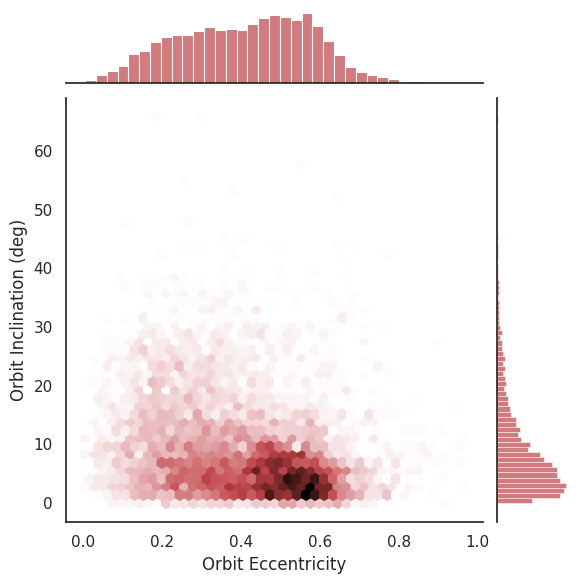

In [10]:
sns.jointplot(data=df, x="Orbit Eccentricity", y="Orbit Inclination (deg)", kind="hex", color="r")

### There does seem to be a concentration of asteroids with an elliptical orbit in an inclination from 0 to 10 degrees (relative to the Solar Plane), however this concentration is not very strong. Most of the asteroids seem to be in an inclination of 0 to 10 degrees regardless of their orbit eccentricity.

### What is the orbit axis?

The orbit axis is the semi-major axis. This is the average of the maximum distance ($r_{max}$) and minimum distance ($r_{min}$). The minimum distance is also called the semi-minor axis.

Source: https://en.wikipedia.org/wiki/Semi-major_and_semi-minor_axes#Ellipse

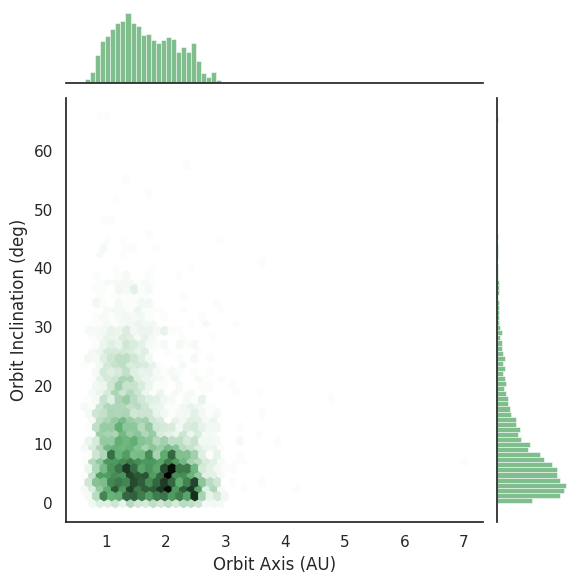

In [11]:
sns.set_theme(style="white")
sns.jointplot(data=df, x="Orbit Axis (AU)", y="Orbit Inclination (deg)", kind="hex", color="g")

### A vast majority of asteroids seem to be in an inclination of 0 to 10 degrees, regardless of their orbit axis. This warrants an investigation of the count of the asteroids in the different inclinations to rule out the possibility of correlation.  

<AxesSubplot: xlabel='Orbit Inclination (deg)', ylabel='Count'>

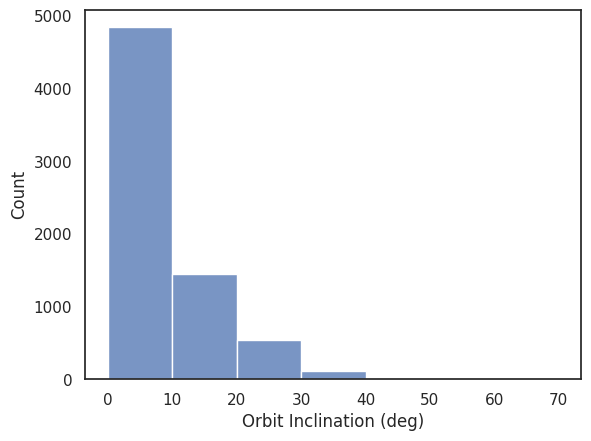

In [14]:
sns.histplot(data=df, x="Orbit Inclination (deg)", binwidth=10,)

### This shows that the vast majority of asteroids (filtered by magnitude) are in an inclination of 0 to 10 degrees. Therefore filtering by orbit inclination to include only asteroids in an inclination of 0 to 10 degrees is may show a finer correlation between the orbit eccentricity and other parameters.

In [15]:
df_filtered = df[df["Orbit Inclination (deg)"].between(0,10)]

#### Having filtered asteroids by orbit inclination, the Magnitude - Eccentricity plot and the Magnitude - Inclination plot can be plotted again to see if there is any correlation.

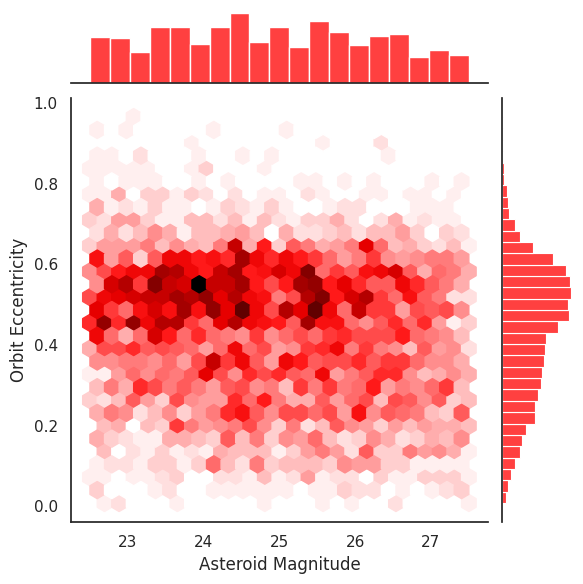

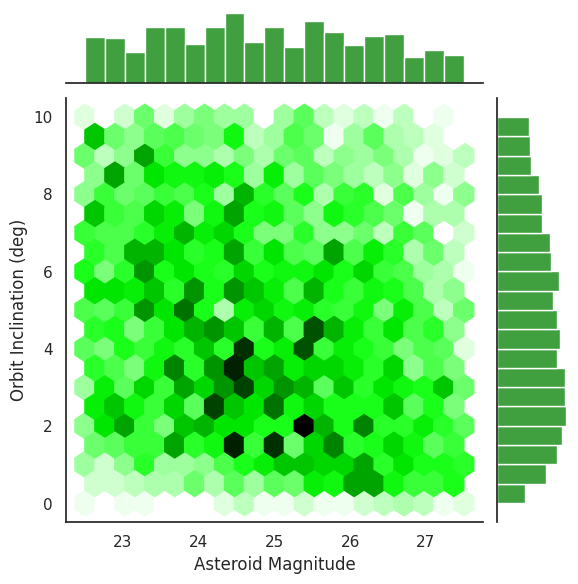

In [17]:
sns.jointplot(data=df_filtered, x='Asteroid Magnitude', y='Orbit Eccentricity', kind='hex', color="red") 
sns.jointplot(data=df_filtered, x='Asteroid Magnitude', y='Orbit Inclination (deg)', kind='hex',color="green")

### There does not seem to be a correlation between the orbit inclination and the asteroid magnitude. There also does not seem to be a correlation between the orbit eccentricity and the asteroid magnitude. It may be worth filtering locating and filtering for the most common eccentricities to further fine tune the data.

<AxesSubplot: xlabel='Orbit Eccentricity', ylabel='Count'>

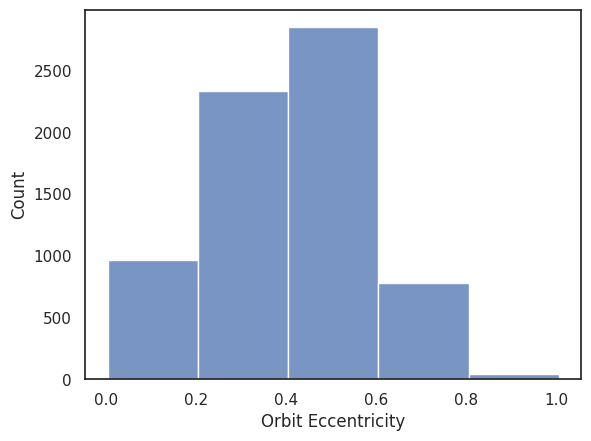

In [18]:
sns.histplot(data=df, x="Orbit Eccentricity", binwidth=0.2,)

### A lot of asteroids seem to be in an orbit eccentricity of 0.2 to 0.6. Further plotting with this as a filter may reveal new insights.

In [19]:
df_filtered = df_filtered[df_filtered["Orbit Eccentricity"].between(0.2,0.6)]

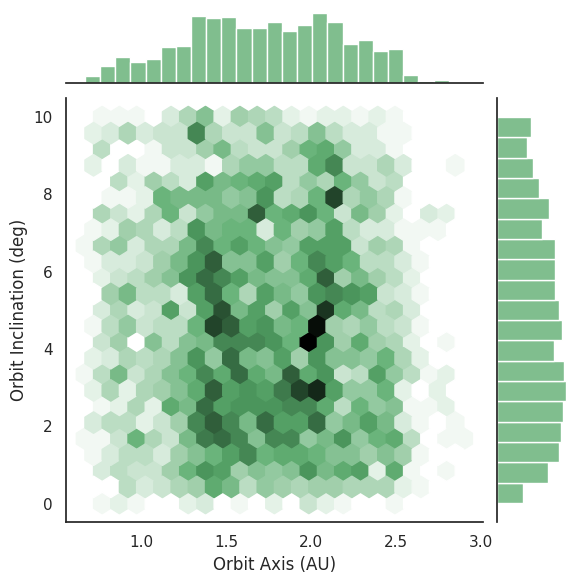

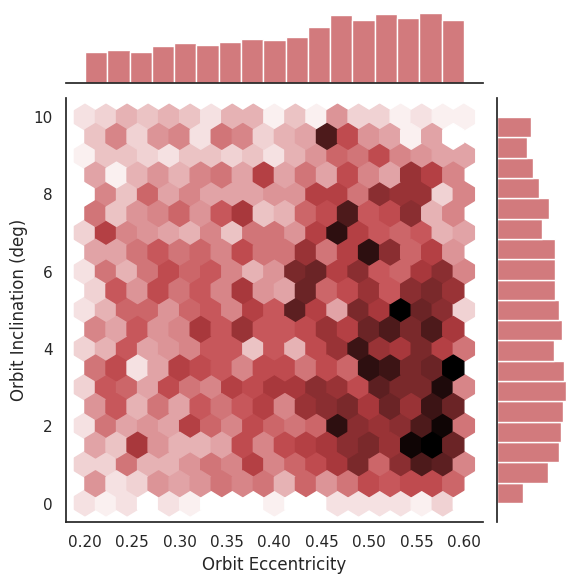

In [21]:
sns.jointplot(data=df_filtered, x="Orbit Axis (AU)", y="Orbit Inclination (deg)", kind="hex", color="g")
sns.jointplot(data=df_filtered, x="Orbit Eccentricity", y="Orbit Inclination (deg)", kind="hex", color="r")

### Despite the filtering, no correlation seems to be revealed.

## Conclusion 
Despite filtering, there does not seem to be a correlation between the orbit eccentricity, orbit inclination, and orbit axis of asteroids that are hazardous to Earth.

## Analysis Plan

Due to the lack of correlation, I feel that the research question needs to be altered.

## Research Question
Is there any correlation between the orbit eccentricity, orbit inclination, and orbit axis with the Perihelion or Aphelion distance of the asteroids that are hazardous to Earth? Is there an identifiable concentration of asteroids that are worth monitoring?

## Analysis Plan
- Filter the data to only include asteroids with a magnitude between 22.5 and 27.5.
- Filter the data to only include asteroids with a orbit eccentricity between 0.2 and 0.6.
- Filter the data to only include asteroids with a orbit inclination between 0 and 10 degrees.
- Compare the plots of these parameters with the plots of the Perihelion and Aphelion distances of the asteroids, and determine if there is any correlation.

In [ ]:
df_filtered.to_csv("../data/processed/Processed_Orbits.csv")